# Apresentação:

    Projeto de análise de audio

# Bibliotecas Utilizadas:

In [1]:
# Importações:
import librosa # Note que já está instalado
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display, clear_output
from ipywidgets import Button, Output, HBox
import sklearn.decomposition
import time

# Importação do audio e Elaboração da visualização:

In [2]:
# Importando o som:
y, sr = librosa.load('Warrior.wav')

In [3]:
# Calcular o eixo do tempo em segundos
time = librosa.times_like(y, sr=sr)

# Inicializar o gráfico da forma de onda
output = Output()
with output:
    plt.figure(figsize=(12, 4))
    plt.title('Forma de Onda do Áudio')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

# Função para atualizar o gráfico
def update_plot(frame):
    with output:
        clear_output(wait=True)
        plt.title('Forma de Onda do Áudio')
        plt.xlabel('Tempo (s)')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.plot(time[:frame], y[:frame], label='Forma de Onda')
        plt.legend()

# Reproduzir o áudio
audio_player = Audio(data=y, rate=sr)
display(audio_player)

# Função para iniciar a construção do gráfico
def start_plotting(button):
    with output:
        plt.ion()  # Ativar o modo interativo do Matplotlib
        for frame in range(0, len(y), int(sr/10)):  # Atualize a cada 1/10 de segundo
            update_plot(frame)
            clear_output(wait=True)
            plt.pause(0.1)
        plt.ioff()
        update_plot(len(y))

# Botão para iniciar a construção do gráfico
start_button = Button(description="Iniciar Gráfico")
start_button.on_click(start_plotting)

# Exibir o botão e o gráfico
display(HBox([start_button, output]))

Output hidden; open in https://colab.research.google.com to view.

# Análises dos Espectrogramas


```
O espectrograma é uma ferramenta fundamental na análise de áudios, pois
fornece informações valiosas sobre a distribuição das frequências ao longo
do tempo em um sinal de áudio.
```



In [4]:
# calculando a Transformada de Fourier de Curto Prazo:
S = np.abs(librosa.stft(y))

## Decomposição Frequência de Picos Ascendente:

In [5]:
# Classificando os componentes por frequência de pico ascendente:
comps, acts = librosa.decompose.decompose(S, n_components=16,sort=True)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


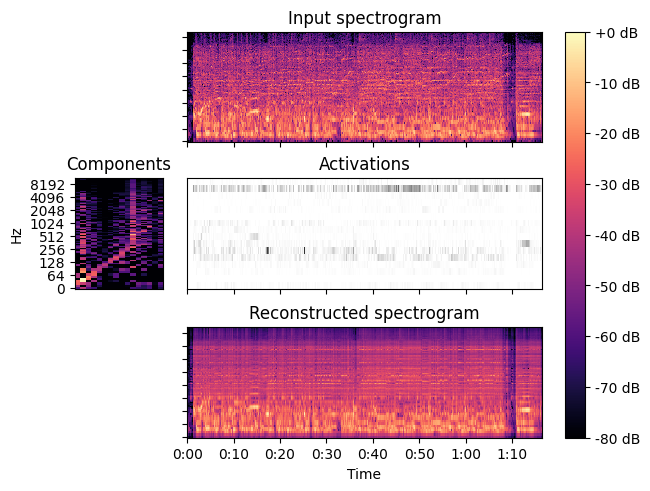

In [6]:
# Espectrograma frequência de pico ascendente:
layout = [list(".AAAA"), list("BCCCC"), list(".DDDD")]
fig, ax = plt.subplot_mosaic(layout, constrained_layout=True)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax['A'])
ax['A'].set(title='Input spectrogram')
ax['A'].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(comps,
                                                 ref=np.max),
                         y_axis='log', ax=ax['B'])
ax['B'].set(title='Components')
ax['B'].label_outer()
ax['B'].sharey(ax['A'])
librosa.display.specshow(acts, x_axis='time', ax=ax['C'], cmap='gray_r')
ax['C'].set(ylabel='Components', title='Activations')
ax['C'].sharex(ax['A'])
ax['C'].label_outer()
S_approx = comps.dot(acts)
img = librosa.display.specshow(librosa.amplitude_to_db(S_approx,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax['D'])
ax['D'].set(title='Reconstructed spectrogram')
ax['D'].sharex(ax['A'])
ax['D'].sharey(ax['A'])
ax['D'].label_outer()
fig.colorbar(img, ax=list(ax.values()), format="%+2.f dB", cmap='YlGnBu')

## Decomposição por Aprendizado de Dicionário (Machine Learning):

In [7]:
# Classificando os componentes com Machine Learning:
T = sklearn.decomposition.MiniBatchDictionaryLearning(n_components=16)
scomps, sacts = librosa.decompose.decompose(S, transformer=T, sort=True)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:2290: FutureWarning: The default value of batch_size will change from 3 to 256 in 1.3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_dict_learning.py:213: RuntimeWarning: Orthogonal matching pursuit ended prematurely due to linear dependence in the dictionary. The requested precision might not have been met.
  new_code = orthogonal_mp_gram(


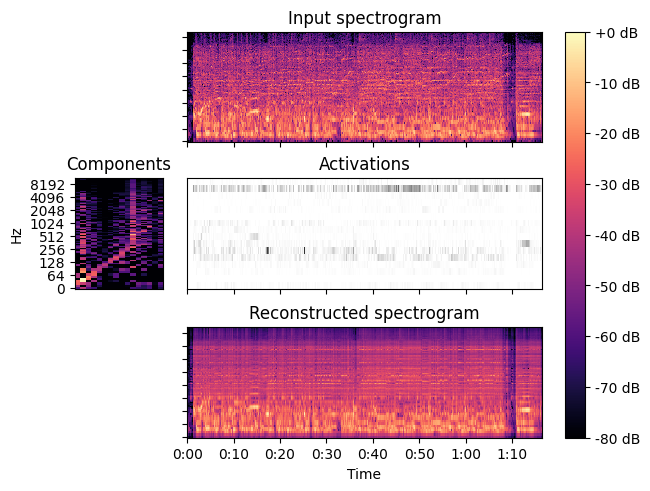

In [8]:
# Espectrograma Machine Leaning:
layout = [list(".AAAA"), list("BCCCC"), list(".DDDD")]
fig, ax = plt.subplot_mosaic(layout, constrained_layout=True)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax['A'])
ax['A'].set(title='Input spectrogram')
ax['A'].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(comps,
                                                 ref=np.max),
                         y_axis='log', ax=ax['B'])
ax['B'].set(title='Components')
ax['B'].label_outer()
ax['B'].sharey(ax['A'])
librosa.display.specshow(acts, x_axis='time', ax=ax['C'], cmap='gray_r')
ax['C'].set(ylabel='Components', title='Activations')
ax['C'].sharex(ax['A'])
ax['C'].label_outer()
S_approx = comps.dot(acts)
img = librosa.display.specshow(librosa.amplitude_to_db(S_approx,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax['D'])
ax['D'].set(title='Reconstructed spectrogram')
ax['D'].sharex(ax['A'])
ax['D'].sharey(ax['A'])
ax['D'].label_outer()
fig.colorbar(img, ax=list(ax.values()), format="%+2.f dB")

## Análise de Espectrograma vertical Harmonico e Percussivo

In [9]:
# Separação do Espectrogama para Hamonico e Percussivo:
D = librosa.stft(y)
H, P = librosa.decompose.hpss(D)

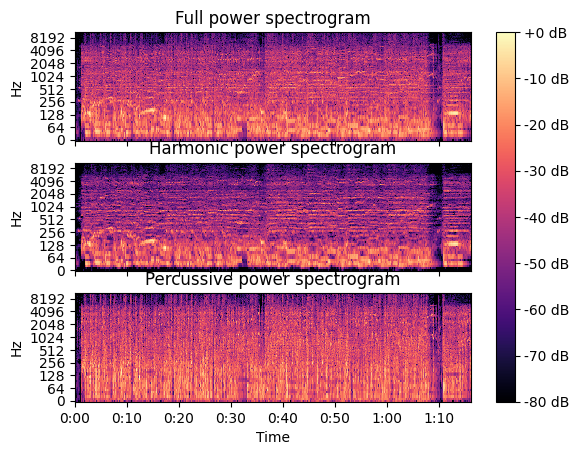

In [10]:
# Visualização do Espectrograma sem tratamento:
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(D),
                                                       ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Full power spectrogram')
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(np.abs(H),
                                                 ref=np.max(np.abs(D))),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Harmonic power spectrogram')
ax[1].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(np.abs(P),
                                                 ref=np.max(np.abs(D))),
                         y_axis='log', x_axis='time', ax=ax[2])
ax[2].set(title='Percussive power spectrogram')
fig.colorbar(img, ax=ax, format='%+2.0f dB')